In [53]:
#importing all the necessary libraries
import numpy as np
import pandas as pd
import sklearn
import sklearn.linear_model
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set() 

In [54]:
# Adding First Dataset: Better Life Index
indicators = pd.read_csv("BLI_04032019230838221.csv")
indicators.head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,4.3,NaN,NaN
1,AUT,Austria,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,2.7,NaN,NaN
2,BEL,Belgium,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,4.8,NaN,NaN
3,CAN,Canada,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.9,NaN,NaN
4,CZE,Czech Republic,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,1.8,NaN,NaN


In [55]:
# Creating a new Table to suit our needs. Using total life satisfaction values.
life_sat = indicators[(indicators["Indicator"] == 'Life satisfaction') & (indicators["Inequality"] == 'Total')][['Country','Value']]
life_sat.head()

,Country,Value
2859,Australia,7.3
2860,Austria,7.0
2861,Belgium,6.9
2862,Canada,7.3
2863,Czech Republic,6.6


In [56]:
# Adding Second Dataset: GDP per capita of countries
gdp_pc = pd.read_csv('imf-dm-export-2019.csv', encoding = 'latin1')
gdp_pc.columns = ('Country', 'GDP/Cap') #changing column names to match the first table
gdp_pc.head()

,Country,GDP/Cap
0,NaN,NaN
1,Afghanistan,577.213
2,Albania,5448.339
3,Algeria,4645.659
4,Angola,3666.347


In [57]:
#Creating a merged table for our analysis
stats = pd.merge(gdp_pc, life_sat, how = 'right')
stats.head()

,Country,GDP/Cap,Value
0,Australia,57203.578,7.3
1,Austria,52474.348,7.0
2,Belgium,47532.382,6.9
3,Brazil,9159.549,6.6
4,Canada,48601.046,7.3


In [58]:
# Looking up missing values for Korea and Russia and droping the OECD Total row
stats.iloc[-3:-1, 1:2] = [29742.842, 10743.102]
stats = stats.drop(38)
stats['GDP/Cap'] = (stats['GDP/Cap']).astype(str).astype('float') #changing dtype of GDP/Cap from Object to float

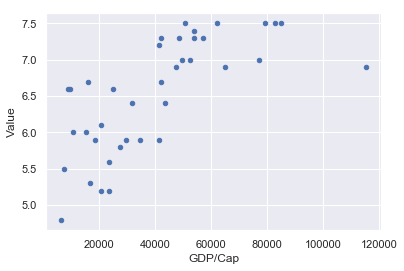

In [44]:
#Plot 1 
stats.plot(kind = 'scatter', x = 'GDP/Cap', y = 'Value') ;

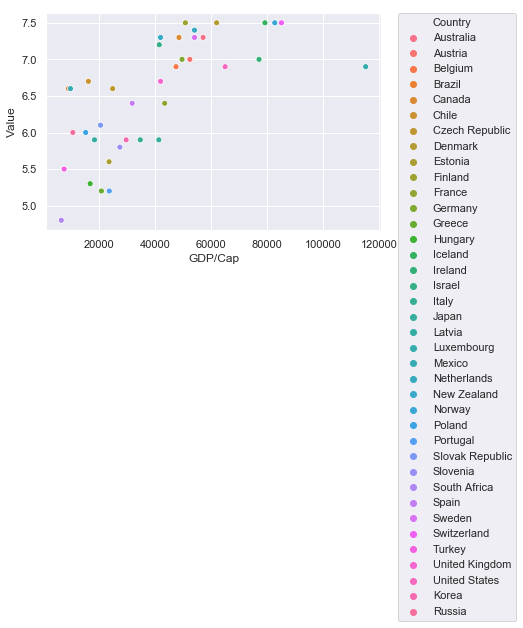

In [45]:
# Plot 2 with countries
sns.scatterplot(x='GDP/Cap', y='Value', hue='Country', data=stats)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

In [52]:
#selecting a linear model
model = sklearn.linear_model.LinearRegression()
#training the model
model.fit(np.c_[stats['GDP/Cap']], np.c_[stats['Value']])  
#Making a prediction for India
print(model.predict([[1939.61]])) 


[[5.69634512]]


In [59]:
#things to note: 
#1. pretty bad model 
#2. Linear regression might not the best model
#3. Assuming Life Satisfaction is only dependent on GPD/capita
#4. GPD/Capita is itself a biased estimator of weath distribution